# **데이터 불러오기**

###**Question_pair** 

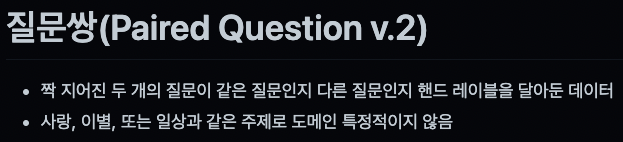
- https://github.com/songys/Question_pair

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# git clone 으로 불러오기.
# !git clone https://github.com/songys/Question_pair.git

In [3]:
# 웹 서버로부터 콘텐츠를 바로 불러오기.

!wget https://raw.githubusercontent.com/songys/Question_pair/master/kor_pair_train.csv  # pair_train 데이터
!wget https://raw.githubusercontent.com/songys/Question_pair/master/kor_Pair_test.csv   # pair_test 데이터
# !wget https://raw.githubusercontent.com/songys/Question_pair/master/train.txt         # train 데이터
# !wget https://raw.githubusercontent.com/songys/Question_pair/master/test.txt          # test 데이터
# !wget https://raw.githubusercontent.com/songys/Question_pair/master/validation.txt    # val 데이터

--2022-05-27 07:10:27--  https://raw.githubusercontent.com/songys/Question_pair/master/kor_pair_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608164 (594K) [text/plain]
Saving to: ‘kor_pair_train.csv.2’

kor_pair_train.csv. 100%[===================>] 593.91K  --.-KB/s    in 0.04s   

2022-05-27 07:10:27 (13.5 MB/s) - ‘kor_pair_train.csv.2’ saved [608164/608164]

--2022-05-27 07:10:27--  https://raw.githubusercontent.com/songys/Question_pair/master/kor_Pair_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52943 

In [4]:
df_pair_train = pd.read_csv('kor_pair_train.csv')
df_pair_test = pd.read_csv('kor_Pair_test.csv')
print(df_pair_train.shape, df_pair_test.shape)

(6888, 6) (688, 5)


In [5]:
# df_train = pd.read_csv('train.txt', sep = "\t", engine='python', encoding = "utf-8") # train DataFrame

# df_test = pd.read_csv('test.txt', sep = "\t", engine='python', encoding = "utf-8") # test DataFrame

# df_val = pd.read_csv('validation.txt', sep = "\t", engine='python', encoding = "utf-8") # validation DataFrame

# print(df_train.shape, df_test.shape, df_val.shape)

In [6]:
df_pair_train.isna().sum()  #결측치 확인

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df_pair_test.isna().sum() #결측치 확인

test_id           0
question1         0
question2         0
is_duplicate      0
Unnamed: 4      687
dtype: int64

In [8]:
df_pair_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,1,1,2,1000일 만난 여자친구와 이별,10년 연예의끝,1
1,2,3,4,10년 연애사 되돌아보니 다 부질없네,10년이라는 시간이 참 무색하다 싶네,1
2,3,5,6,10년만나다 헤어지네,14년된 여자친구랑 이별,1
3,4,7,8,10월의 마지막밤 . 더 보고싶네 그사람,15년…안녕,1
4,5,9,10,14년의 기나긴 이야기.,1년 9개월 의 연애 종지부.,1


In [9]:
df_pair_test.head()

,test_id,question1,question2,is_duplicate,Unnamed: 4
0,1,21살의 사랑에 대해,사랑을 노력한다는게 말이 되나요?,1,NaN
1,2,2년 가량의 연애,2년 만났어,0,NaN
2,3,2년 만난 기념일이야,우리 벌써 2년 동안 사궜어,0,NaN
3,4,2년 사귀었는데 결혼하려고,2년째 짝사랑하는 사람이 있어.,1,NaN
4,5,5급면제도 나랑사랑카드 발급하나요?,아이콘 노래 사랑을 했다 별로인것같은데,1,NaN


In [10]:
pair_train = df_pair_train.iloc[:,[3,4,5]] # 필요한 train data columns
pair_train.head() # 6888, 3

,question1,question2,is_duplicate
0,1000일 만난 여자친구와 이별,10년 연예의끝,1
1,10년 연애사 되돌아보니 다 부질없네,10년이라는 시간이 참 무색하다 싶네,1
2,10년만나다 헤어지네,14년된 여자친구랑 이별,1
3,10월의 마지막밤 . 더 보고싶네 그사람,15년…안녕,1
4,14년의 기나긴 이야기.,1년 9개월 의 연애 종지부.,1


In [11]:
pair_test = df_pair_test.iloc[:,[1,2,3]] # 필요한 test data columns
pair_test.head() # 688, 3

,question1,question2,is_duplicate
0,21살의 사랑에 대해,사랑을 노력한다는게 말이 되나요?,1
1,2년 가량의 연애,2년 만났어,0
2,2년 만난 기념일이야,우리 벌써 2년 동안 사궜어,0
3,2년 사귀었는데 결혼하려고,2년째 짝사랑하는 사람이 있어.,1
4,5급면제도 나랑사랑카드 발급하나요?,아이콘 노래 사랑을 했다 별로인것같은데,1



##### **- 같은 질문 : 0**
##### **- 다른 질문 : 1**

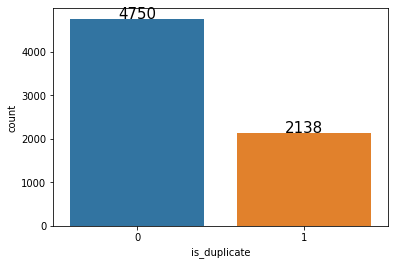

In [12]:
# pair_train 데이터 비율 시각화

ax = sns.countplot(data = pair_train, x ='is_duplicate')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height+3, height, ha='center', size=15)

plt.show()

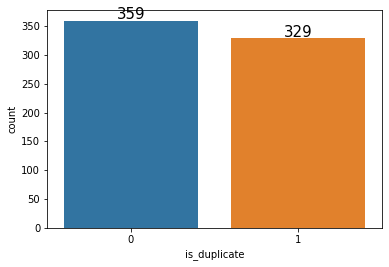

In [13]:
# pair_test 데이터 비율 시각화

ax = sns.countplot(data = pair_test, x ='is_duplicate')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height+3, height, ha='center', size=15)

plt.show()

In [ ]:
# df_train.head()

In [ ]:
# ax = sns.countplot(data = df_train, x ='is_duplicate')
# for i in ax.patches:
#     height = i.get_height()
#     ax.text(i.get_x() + i.get_width()/2, height+3, height, ha='center', size=15)

# plt.show()

In [ ]:
# df_test.head()

In [ ]:
# ax = sns.countplot(data = df_test, x ='is_duplicate')
# for i in ax.patches:
#     height = i.get_height()
#     ax.text(i.get_x() + i.get_width()/2, height+3, height, ha='center', size=15)

# plt.show()

In [ ]:
# df_val.head()

In [ ]:
# ax = sns.countplot(data = df_val, x ='is_duplicate')
# for i in ax.patches:
#     height = i.get_height()
#     ax.text(i.get_x() + i.get_width()/2, height+3, height, ha='center', size=15)

# plt.show()